LINEAR REGRESSION WITH HOUSES

In [33]:
import pandas as pd
import numpy as np

houses = pd.read_csv("AmesHousing.txt",sep="\t")

train = houses.iloc[0:1400]
test  = houses.iloc[1400:]

target = "SalePrice"

houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

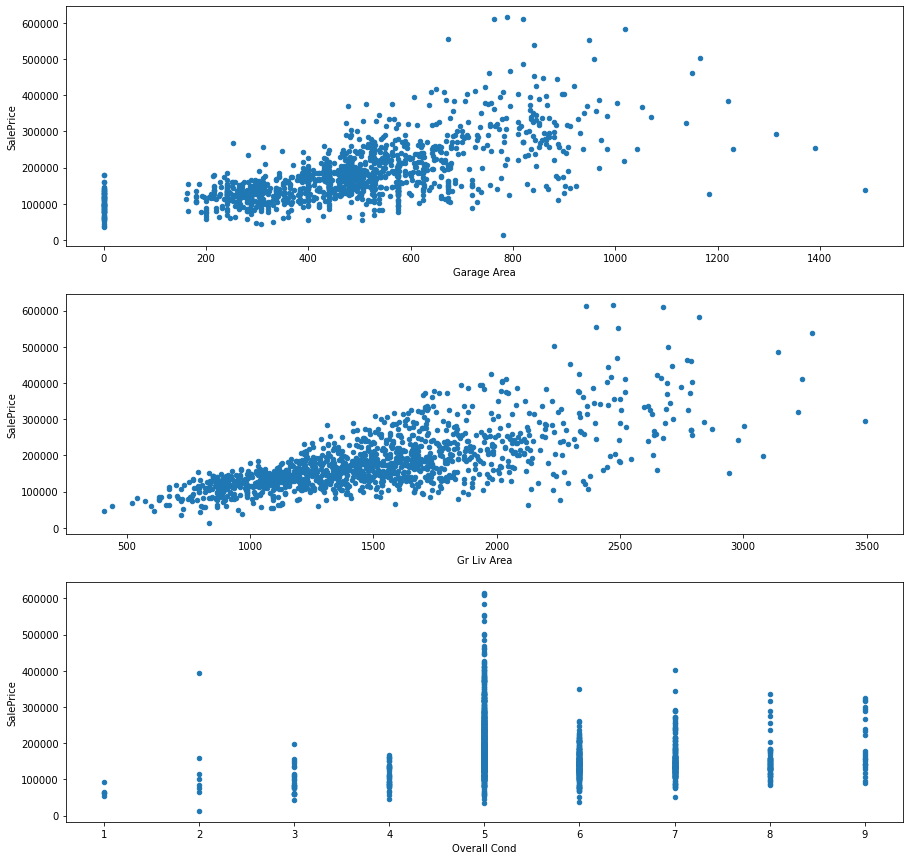

In [39]:
from sklearn import linear_model
import matplotlib.pyplot as plt

#create plot 
fig = plt.figure(figsize=(15,15))
#nrows, ncols, index
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x="Garage Area",y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area",y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond",y="SalePrice", ax=ax3, kind="scatter")

plt.show()


In [40]:
#evaluation de la correlation entre les caractéristiques et le prix
train[["Garage Area","Gr Liv Area","Overall Cond","SalePrice"]].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.463455,-0.121328,0.659605
Gr Liv Area,0.463455,1.000000,-0.128075,0.697764
Overall Cond,-0.121328,-0.128075,1.000000,-0.093996
SalePrice,0.659605,0.697764,-0.093996,1.000000


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(train[["Gr Liv Area"]], train["SalePrice"])

#formule de reg lineaire : y = a1*x+a0
a0 = lr.coef_
a1 = lr.intercept_

#coef
print (a0)

#intercept
print (a1)

train_predictions = lr.predict(train[["Gr Liv Area"]]) 
test_predictions  = lr.predict(test[["Gr Liv Area"]]) 

train_mse = mean_squared_error(train_predictions, train["SalePrice"])
test_rmse = mean_squared_error(test_predictions, test["SalePrice"])

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_rmse)

print(train_rmse)

print(test_rmse)

[117.00335912]
4711.017997844756
56368.651491939556
56757.27436004431


In [44]:
#regression linéaire multi-varié
cols = ["Overall Cond","Gr Liv Area"]

lr.fit(train[cols], train["SalePrice"])

train_predictions_2 = lr.predict(train[cols]) 
test_predictions_2  = lr.predict(test[cols]) 

train_mse_2 = mean_squared_error(train_predictions_2, train["SalePrice"])
test_rmse_2 = mean_squared_error(test_predictions_2, test["SalePrice"])

train_rmse_2 = np.sqrt(train_mse_2)
test_rmse_2  = np.sqrt(test_rmse_2)

print(train_rmse_2)
print(test_rmse_2)

56367.45462060029
56740.351329305435
